# AudioEffector Usages

`AudioEffector` combines in-memory `encoding`, `decoding` and `filtering` that are provided by `StreamWriter` and `StreamReader`.

![](https://download.pytorch.org/torchaudio/tutorial-assets/AudioEffector.png)

In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.1.0
2.1.0


In [2]:
from torchaudio.io import AudioEffector, CodecConfig

import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
for k, v in torchaudio.utils.ffmpeg_utils.get_versions().items():
    print(k, v)

libavcodec (58, 91, 100)
libavdevice (58, 10, 100)
libavfilter (7, 85, 100)
libavformat (58, 45, 100)
libavutil (56, 51, 100)


## Usage

```python
effector = AudioEffector(effect=..., format=...,)

# Apply at once
applied = effector.apply(waveform, sample_rate)

# Apply chunk by chunk
for applied_chunk = effector.stream(waveform, sample_rate):
    ...
```

### Example

In [7]:
# src = torchaudio.utils.download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
CUSTOM_WAV = "datasets/vivos/test/waves/VIVOSDEV01/VIVOSDEV01_R002.wav"
waveform, sr = torchaudio.load(CUSTOM_WAV, channels_first=False)

### Gallery

In [8]:
def show(effect, *, stereo=False):
    wf = torch.cat([waveform] * 2, dim=1) if stereo else waveform
    figsize = (6.4, 2.1 if stereo else 1.2)

    effector = AudioEffector(effect=effect, pad_end=False)
    result = effector.apply(wf, int(sr))

    num_channels = result.size(1)
    f, ax = plt.subplots(num_channels, 1, squeeze=False, figsize=figsize, sharex=True)
    for i in range(num_channels):
        ax[i][0].specgram(result[:, i], Fs=sr)
    f.set_tight_layout(True)

    return Audio(result.numpy().T, rate=sr)

### Original

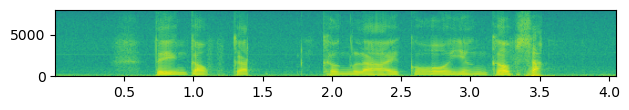

In [9]:
show(effect=None)

### Effects

#### Tempo

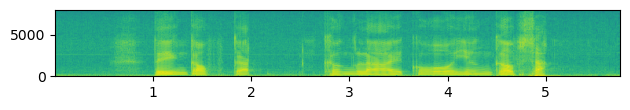

In [10]:
show("atempo=0.7")

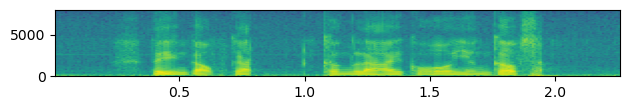

In [11]:
show("atempo=1.8")

#### highpass

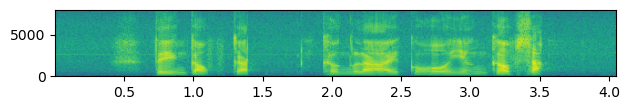

In [12]:
show("highpass=frequency=1500")

#### lowpass

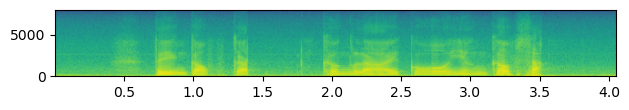

In [13]:
show("lowpass=frequency=1000")

#### allpass

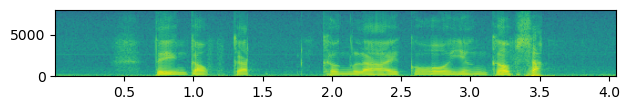

In [14]:
show("allpass")

#### bandpass

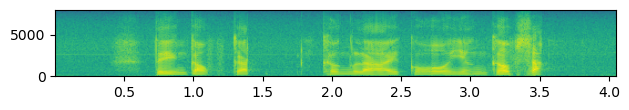

In [15]:
show("bandpass=frequency=3000")

#### bandreject

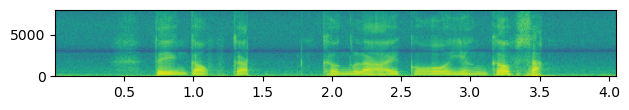

In [16]:
show("bandreject=frequency=3000")

#### Read more:

https://pytorch.org/audio/stable/tutorials/effector_tutorial.html#effects

### Codecs

In [17]:
def show_multi(configs):
    results = []
    for config in configs:
        effector = AudioEffector(**config)
        results.append(effector.apply(waveform, int(sr)))

    num_configs = len(configs)
    figsize = (6.4, 0.3 + num_configs * 0.9)
    f, axes = plt.subplots(num_configs, 1, figsize=figsize, sharex=True)
    for result, ax in zip(results, axes):
        ax.specgram(result[:, 0], Fs=sr)
    f.set_tight_layout(True)

    return [Audio(r.numpy().T, rate=sr) for r in results]

#### ogg

[W encode_process.cpp:170] Warning: "vorbis" encoder is selected. Enabling '-strict experimental'. If this is not desired, please provide "strict" encoder option with desired value. (function operator())
[W encode_process.cpp:179] Warning: "opus" encoder is selected. Enabling '-strict experimental'. If this is not desired, please provide "strict" encoder option with desired value. (function operator())
/home/mpp/miniconda3/envs/audio/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


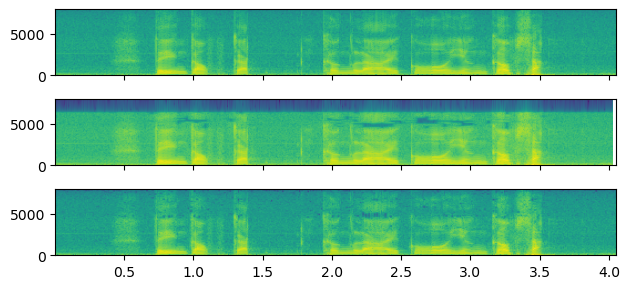

In [18]:
results = show_multi(
    [
        {"format": "ogg"},
        {"format": "ogg", "encoder": "vorbis"},
        {"format": "ogg", "encoder": "opus"},
    ]
)

ogg - default encoder (flac)

In [19]:
results[0]

In [20]:
results[1]

In [21]:
results[2]

#### mp3

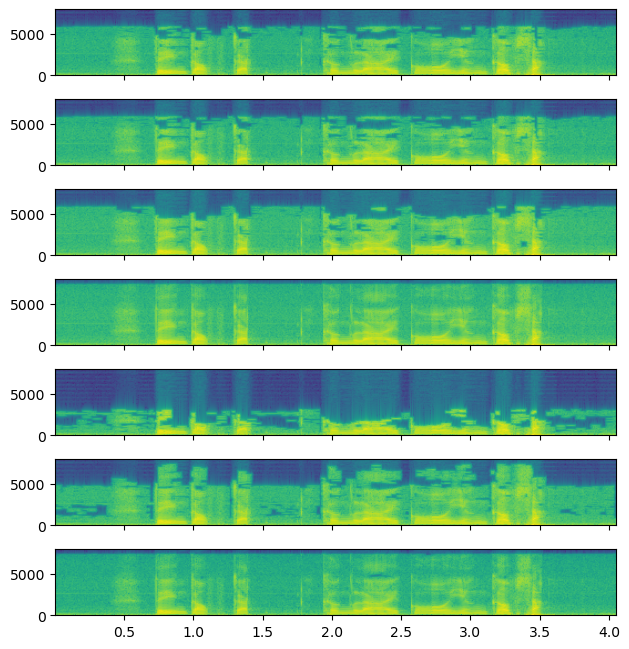

In [22]:
results = show_multi(
    [
        {"format": "mp3"},
        {"format": "mp3", "codec_config": CodecConfig(compression_level=1)},
        {"format": "mp3", "codec_config": CodecConfig(compression_level=9)},
        {"format": "mp3", "codec_config": CodecConfig(bit_rate=192_000)},
        {"format": "mp3", "codec_config": CodecConfig(bit_rate=8_000)},
        {"format": "mp3", "codec_config": CodecConfig(qscale=9)},
        {"format": "mp3", "codec_config": CodecConfig(qscale=1)},
    ]
)

In [23]:
# default
results[0]

In [24]:
# compression_level=1
results[1]

In [25]:
# compression_level=9
results[2]

In [27]:
# bit_rate=192k
results[3]

In [28]:
# bit_rate=8k
results[4]

In [29]:
# qscale=9
results[5]

In [31]:
# qscale=1
results[6]